In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [37]:
pd.concat([train_data, test_data]).reset_index(drop=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,1,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,31.252936,0,0,A.5. 3236,8.0500,0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,1,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,53.703295,0,0,359309,8.0500,0,S


# Overview

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
cabin_profile = train_data.loc[train_data["Cabin"].isnull() != True]
cabin_profile

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [9]:
cabin_profile["Cabin"].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [10]:
cabin_profile["Cabin"].value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
D              3
F2             3
              ..
B41            1
D11            1
C148           1
T              1
A14            1
Name: Cabin, Length: 147, dtype: int64

In [11]:
print(sum(cabin_profile["Survived"]) / len(cabin_profile["Survived"]))

0.6666666666666666


In [12]:
train_data["Survived"].mean()

0.3838383838383838

The mean value of survived whole people of titanic is 0.38; but the mean value of survived cabin is 0.66. Thus, we may consider that cabin is feature.

# Dataset cleansing

In [13]:
train_data.loc[train_data["Cabin"].isnull() == False, "Cabin"] = 1
train_data.loc[train_data["Cabin"].isnull() != False, "Cabin"] = 0

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [15]:
test_data.loc[test_data["Cabin"].isnull() == False, "Cabin"] = 1
test_data.loc[test_data["Cabin"].isnull() != False, "Cabin"] = 0

In [16]:
mean = train_data.describe()["Age"]["mean"]
std = train_data.describe()["Age"]["std"]

In [17]:
num_of_null = train_data.isnull().sum(axis=0)["Age"]

In [18]:
ages = np.abs(np.random.normal(mean, std, num_of_null))
ages

array([36.63652945, 41.97659094, 24.65152636, 22.49309477,  8.96690911,
       40.96253655, 12.25272437, 26.17594233, 42.11483487, 12.83476256,
       28.07672788, 24.5504012 , 42.77545093, 49.99298262, 26.45707606,
       16.70730364, 58.1776905 , 25.85075444, 17.60538469,  4.56345201,
       38.08616411, 40.19292236, 22.63592165, 39.69633619, 51.12440468,
       32.30221321, 33.54222561, 43.60759184, 39.87036121, 22.52935798,
        1.31208561, 20.75433255, 34.56373892, 30.48441507, 23.47337226,
       17.62702902, 29.71016941,  5.2853386 , 31.6538456 , 27.7626921 ,
       54.03492765, 45.91789276, 25.81981101, 16.96739567, 41.68726135,
       32.30638503, 40.57331636, 15.19911057,  3.14967156,  9.13149762,
       28.15179023, 32.90030782, 41.77270321, 45.51910475, 23.52164065,
       31.0138271 , 27.70473636, 51.36511448, 29.86854592, 28.71974823,
       28.01244755, 19.00843885, 48.02760258, 23.06668908, 31.57892711,
        2.35441967, 41.98718538, 37.12048384, 25.00296085, 12.69

In [19]:
train_data.loc[train_data["Age"].isnull(), "Age"] = ages

In [20]:
train_data.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [21]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [22]:
mean = test_data.describe()["Age"]["mean"]
std = test_data.describe()["Age"]["std"]
num_of_null = test_data.isnull().sum(axis=0)["Age"]
ages = np.abs(np.random.normal(mean, std, num_of_null))

In [23]:
test_data.loc[test_data["Age"].isnull(), "Age"] = ages

In [24]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


# Analysis

In [25]:
train_data.isnull().sum(axis=0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [26]:
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Text(0, 0.5, 'Density')

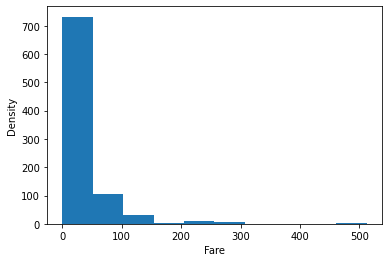

In [27]:
plt.hist(train_data["Fare"])
plt.xlabel("Fare")
plt.ylabel("Density")

In [28]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
Embarked_S = train_data.loc[train_data["Embarked"] == "S"]

In [30]:
sum(Embarked_S["Survived"])/len(Embarked_S["Survived"])

0.33695652173913043

In [31]:
Embarked_C = train_data.loc[train_data["Embarked"] == "C"]
sum(Embarked_C["Survived"])/len(Embarked_C["Survived"])

0.5535714285714286

In [32]:
Embarked_Q = train_data.loc[train_data["Embarked"] == "Q"]
sum(Embarked_Q["Survived"])/len(Embarked_Q["Survived"])

0.38961038961038963

# Classification

In [33]:
y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Age", "Cabin"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

In [34]:
model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=1,
                                           n_jobs=-1,
                                           verbose=1)
model.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.3s finished


RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=4,
                       n_estimators=1100, n_jobs=-1, oob_score=True,
                       random_state=1, verbose=1)

In [35]:
train_data_prediction = model.predict(X)
train_data_prediction_seris = pd.Series(train_data_prediction)

result_on_train_data = pd.DataFrame({
    "ground_truth": train_data["Survived"],
    "prediction": train_data_prediction_seris,
    "score": train_data["Survived"] == train_data_prediction_seris
})

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.2s finished


In [36]:
score = sum(result_on_train_data["score"])/len(result_on_train_data["score"])
print(score)

0.8305274971941639


In [43]:
predictions = model.predict(X_test)

In [44]:
output = pd.DataFrame({'PassengerID': test_data.PassengerId, "Survived" : predictions})
output.to_csv('my_submission.csv', index=False)
print("Done")

Done
